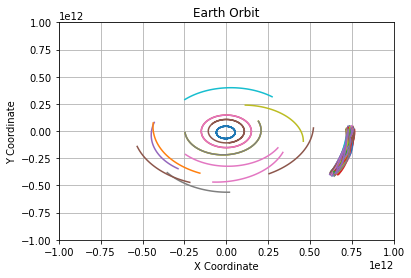

In [366]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

# Directory where the data files are located
data_directory = "createdData"

# Get a list of all .txt files in the directory
data_files = glob.glob(os.path.join(data_directory, "*.txt"))

# Extract planet names from file names
planets_to_load = [os.path.splitext(os.path.basename(file))[0] for file in data_files]

#planets_to_load = ["Earth","Sun"]

#planets_to_load = [    
#    "Ariel",
#  "Umbriel",
#  "Titania",
#   "Oberon",
#  "Miranda",
# "Cordelia",
#  "Ophelia",
#   "Bianca",
# "Cressida",
#"Desdemona",
#   "Juliet",
#   "Portia",
# "Rosalind",
#  "Belinda",
#     "Puck",
#  "Caliban",
#  "Sycorax",
# "Prospero",
#  "Setebos",
# "Stephano",
# "Trinculo",
#"Francisco",
# "Margaret",
#"Ferdinand",
#  "Perdita",
#      "Mab",
#    "Cupid",
#    "Uranus"]

# Create a plot

plt.figure()
centerPlanet = "Sun"
Centerdata = np.genfromtxt(os.path.join(data_directory, centerPlanet + ".txt"), delimiter=',', usecols=(0,1, 2), names=["name","x", "y"])
i = 0
# Iterate through each planet and plot its data
for planet in planets_to_load:
    if planet != "Europa":
        #print(planet)
        data = np.genfromtxt(os.path.join(data_directory, planet + ".txt"), delimiter=',', usecols=(0,1, 2), names=["name","x", "y"])
        plt.plot(data["x"]-Centerdata["x"], data["y"]-Centerdata["y"], label=planet)
        #data["name"] = planet


plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Earth Orbit")
plt.grid(True)
plt.xlim([-1e12,1e12])
plt.ylim([-1e12,1e12])
#plt.legend()

# Save the plot as an SVG file
plt.savefig("planet_orbits.svg", format="svg")
plt.show()



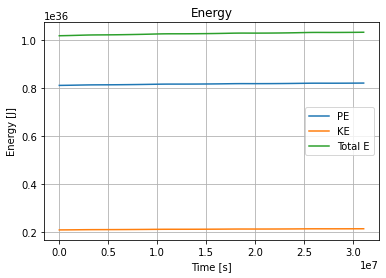

In [359]:
plt.figure()
EnergyData = np.genfromtxt("EnergyOverTime.txt",delimiter=",",usecols=(0,1,2,3),names=["time","PE", "KE","E"])
plt.plot(EnergyData["time"],EnergyData["PE"], label="PE")
plt.plot(EnergyData["time"],EnergyData["KE"], label="KE")
plt.plot(EnergyData["time"],EnergyData["E"], label="Energy")
plt.legend(["PE","KE","Total E"])
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.grid(True)
plt.title("Energy")

plt.savefig("EHaha.svg", format="svg")
plt.show()

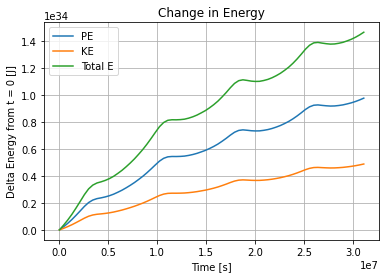

In [360]:
DPE = EnergyData["PE"] - EnergyData["PE"][0]
DKE = EnergyData["KE"] - EnergyData["KE"][0]
DE = EnergyData["E"] - EnergyData["E"][0]

plt.plot(EnergyData["time"],DPE, label="PE")
plt.plot(EnergyData["time"],DKE, label="KE")
plt.plot(EnergyData["time"],DE, label="Energy")
plt.legend(["PE","KE","Total E"])
plt.xlabel("Time [s]")
plt.ylabel("Delta Energy from t = 0 [J]")
plt.title("Change in Energy")
plt.grid(True)
plt.savefig("EZoom.svg", format="svg")
plt.show()

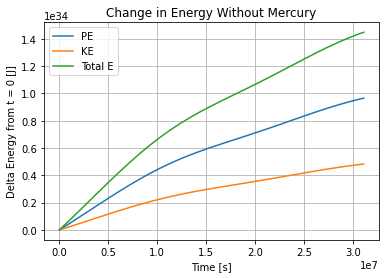

In [361]:
plt.figure()
#Now do it without Mecury :)
EnergyData = np.genfromtxt("EnergyOverTime.txt",delimiter=",",usecols=(0,4,5,6),names=["time","PE", "KE","E"])
#plt.plot(EnergyData["time"],EnergyData["PE"], label="PE")
#plt.plot(EnergyData["time"],EnergyData["KE"], label="KE")
#plt.plot(EnergyData["time"],EnergyData["E"], label="Energy")
DPE = EnergyData["PE"] - EnergyData["PE"][0]
DKE = EnergyData["KE"] - EnergyData["KE"][0]
DE = EnergyData["E"] - EnergyData["E"][0]

plt.plot(EnergyData["time"],DPE, label="PE")
plt.plot(EnergyData["time"],DKE, label="KE")
plt.plot(EnergyData["time"],DE, label="Energy")

plt.legend(["PE","KE","Total E"])
plt.xlabel("Time [s]")
plt.ylabel("Delta Energy from t = 0 [J]")
plt.title("Change in Energy Without Mercury")
plt.grid(True)
plt.savefig("Merc.svg", format="svg")
plt.show()

(0.009739350503317262, 1000.0)

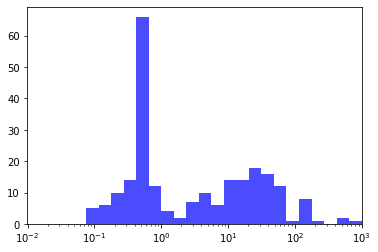

In [362]:
PosDiffData = np.genfromtxt("PlanetsEnd.txt",delimiter=",",usecols=(0,1,2),names=["planet","dr","percentOff"])
bins = np.logspace(-1.5,3,25)
np.insert(bins,0,0)
plt.hist(PosDiffData["percentOff"]*100, color='blue', alpha=0.7, bins=bins)
plt.xscale("log")
plt.xlim([bins[1]/5,bins[-1]])